# Deep Learning

## HW1- problem 2- Support Vector Machine (100 + 10 pts)

### Please fill this part



1.   Full Name: `Zeynab Mottaqi`
2.   Student Number: `99206203`


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [ ]:
# You are not allowed to import other packages.
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC

import cvxopt

#### About the Data:
Heart diseases, also known as [Cardiovascular diseases (CVDs)](https://en.wikipedia.org/wiki/Cardiovascular_disease), are the first cause of death worldwide, taking an estimated 17.9 million lives each year which is about 32% of all deaths all over the world. 

In the present HomeWork, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.

For this perpose, `Heart_Disease_Dataset.csv` file can be used that is attached to the HomeWork folder. Use `Dataset_Description.pdf` for more detail.


In [ ]:
df = pd.read_csv("/content/Heart_Disease_Dataset.csv") 

### Pre-Processing - (40 pts)

#### Exploratory Data Analysis (EDA):
In statistics, exploratory data analysis is an approach to analyze datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is a general approach that should be applied when you encounter a dataset.

shape of dataset is:  (1190, 12)
this dataset has 0 missing value
ballanced: False
--------------------- Plots --------------------------


Text(0.5, 0, 'Gender')

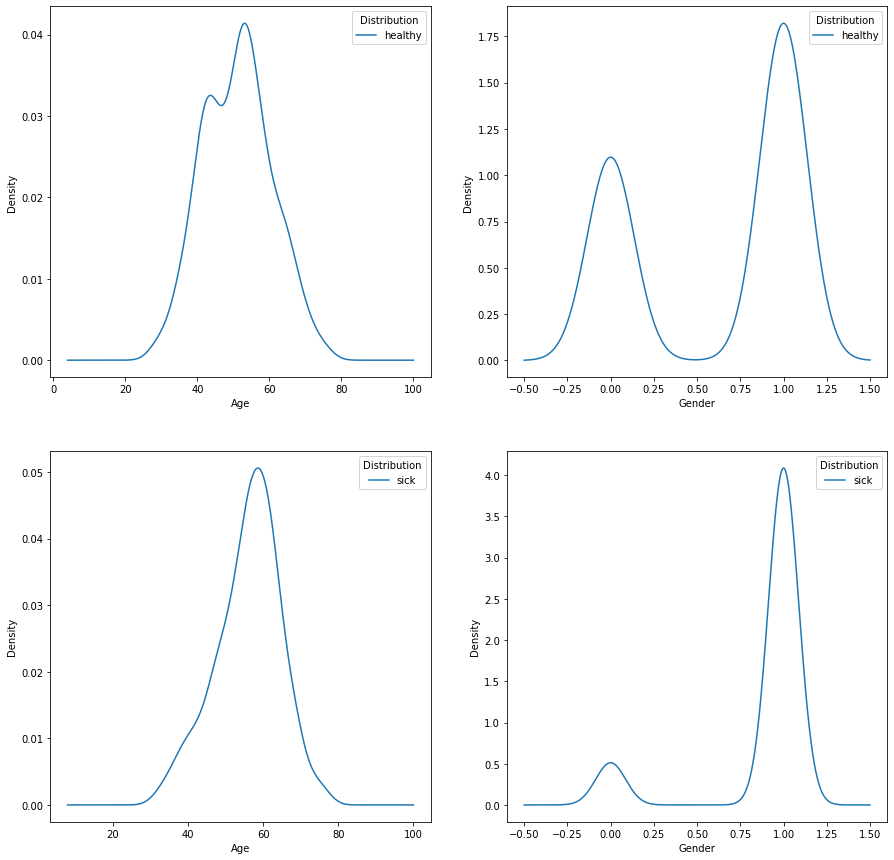

In [ ]:
###############################################################################
## TODO: Find the shape of the dataset.                                      ##
###############################################################################
shape = df.shape
print("shape of dataset is: " , shape)

###############################################################################
## TODO: Check if there is missing entries in the dataset columnwise.        ##
###############################################################################
missings = sum(df.isnull().sum())
print("this dataset has {} missing value".format(missings))

###############################################################################
## TODO: Check whether the dataset is balanced or not.                       ##
## If the difference between 2 classes was less than 100 for our dataset,    ##
## it is called "ballanced".                                                 ##
###############################################################################
class_counts = df["target"].value_counts()
class_1 = class_counts[0]
class_2 = class_counts[1]
stat = False if abs(class_1 - class_2) < 100 else True

print("ballanced: {}".format(stat))
 

###############################################################################
## TODO: plot the age distirbution and gender distrbution for both normal    ##
## and heart diseses patients.(4 plots)                                      ##
###############################################################################
print("--------------------- Plots --------------------------")

healthy_patients = df[df['target']==0]
sick_patients = df[df['target']==1]

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

## Age distribution based on healthy patients
ax1 = healthy_patients['age'].plot(kind='kde', ax=axes[0,0])
ax1.legend(['healthy'], title='Distribution')
ax1.set_xlabel('Age')

## Gender distribution based on healthy patients
ax2 = healthy_patients['sex'].plot(kind='kde', ax=axes[0,1])
ax2.legend(['healthy'], title='Distribution')
ax2.set_xlabel('Gender')

## Age distribution based on sick patients
ax3 = sick_patients['age'].plot(kind='kde', ax=axes[1,0])
ax3.legend(['sick'], title='Distribution')
ax3.set_xlabel('Age')

## Gender distribution based on sick patients
ax4 = sick_patients['sex'].plot(kind='kde', ax=axes[1,1])
ax4.legend(['sick'], title='Distribution')
ax4.set_xlabel('Gender')


#### Question 1: What do you conclude from the plots?
#### Answer:

- Age

unfortunately most samples are from midle ages, therefore in both positive and negative plots the peak of the curve is close to median. However it could be seen that the positive plot is slightly skewed towards higher values while negative plot is slightly skewed towars lower values, which matches our intuition of old age causing more hear disease.

- Sex

Men have much higher chance of being inflicted, since the disparity between male/female bars is much greater in positive plot, and more than what could be described as having more data points on men. If that was the only reason, the ration of male/female bars should have been almost the same in both positive and negative plots

#### Outlier Detection & Removal:
We will filter ouliers using Z-test.

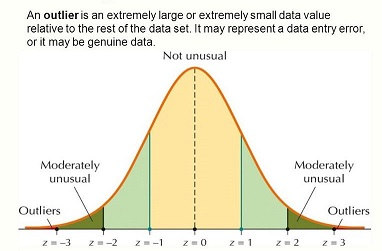

Z-test formula:
\begin{equation*}
    Z = \bigg|\frac {x - mu} {std}\bigg|
\end{equation*}

In [ ]:
################################################################################
## TODO: Suppose that, based on our prior knowledge, we know some columns have##
## outliers. Calculate z-score for each featuer and determine the outliers    ##
## with threshold=3, then eliminate them. Target dataframe has(1173,12)shape. ##
################################################################################
columns = ["age","resting bp s","cholesterol","max heart rate"]
threshold = 3

from scipy.stats import zscore
removed_outliers = df[(np.abs(zscore(df[columns])) < threshold).all(axis=1)]
removed_outliers.shape
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

(1173, 12)

#### Feature Engineering:
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.


In [ ]:
################################################################################
## TODO: Normalize numerical features to be between 0 and 1                   ##
## Note that just numerical fetures should be normalized. type of features is ##
## determined in dataset description file.                                    ##
################################################################################
from sklearn.preprocessing import StandardScaler

numeric_columns = ["age","resting bp s","cholesterol","max heart rate", "oldpeak"]

x = removed_outliers[numeric_columns].to_numpy()
standard_scaler = StandardScaler()
removed_outliers[numeric_columns] = standard_scaler.fit_transform(x)
removed_outliers.head()

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,-1.463228,1,2,0.477692,0.807695,0,0,1.273296,0,-0.849688,1,0
1,-0.501918,0,3,1.642745,-0.299040,0,0,0.639771,0,0.074109,2,1
2,-1.783665,1,2,-0.104835,0.746774,0,1,-1.656760,0,-0.849688,1,0
3,-0.608730,0,4,0.361186,0.046180,0,0,-1.260807,1,0.536007,2,1
4,0.032144,1,3,1.060218,-0.146737,0,0,-0.706472,0,-0.849688,1,0


### SVM - (60 pts)

#### spliting data

In [ ]:
# The original dataset labels is 0 and 1 and in the following code we change it to -1 and 1. 
df.target.replace(0 , -1 , inplace = True) 

# Turn pandas dataframe to numpy array type
df = df.to_numpy()

# Splitting data into train and test part. 70% for train and 30% for test
train = df[:int(len(df) * 0.7)]
test = df[int(len(df) * 0.7):]

# Getting features 
X_train = train[: , :-1]
y_train = train[: , -1]

# Getting labels
X_test = test[: , :-1]
y_test = test[: , -1]

# shapes should be: 
# Train: (821, 11) (821,)
# Test: (352, 11) (352,)
print("Train: ", X_train.shape ,y_train.shape)
print("Test: " ,X_test.shape ,y_test.shape)


Train:  (833, 11) (833,)
Test:  (357, 11) (357,)


#### SVM Using sklearn:
Use the standard libarary SVM classifier (SVC) on the training data, and then test the classifier on the test data. You will need to call SVM with 3 kernels: (1) Linear, (2) Polynomial and (3) RBF. You can change C to achive better results. For "RBF" find "gamma" witch takes 90% accuracy, at least. For polynomial kernel you are allowed to change "degree" to find best results.

For each kernel, reportting the followings is required:
Accuracy, Precision, Recall, F1score.

In [ ]:
@jit(target_backend='cuda')
def classification_report(y_true, y_pred):
    #################################################################################
    ## TODO: Define a function that returns the followings:                        ##
    ## Accuracy, Precision, Recall, F1score.                                       ##
    #################################################################################
    Accuracy = None 
    Precision = None
    Recall = None
    F1score = None

    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(0,len(y_true)):
        if y_true[i] == y_pred[i]:
            if y_pred[i] == 1:
                TP+=1
            else:
                TN+=1
        else:
            if y_pred[i] == 1:
                FP+=1
            else:
                FN+=1
    Accuracy = (TP + TN)/(TP + FP + TN + FN) 
    Precision = TP/(TP+FP)
    Recall = (TP)/(TP+FN)
    F1score = 2*(Precision * Recall)/(Precision + Recall)
  
    #################################################################################
    #                                 END OF YOUR CODE                              #
    #################################################################################
    return Accuracy, Precision, Recall, F1score

In [ ]:
from numba import jit, cuda

In [ ]:
#########################################################################################
## TODO: Use svm of sklearn package (imported above) with 3 kernels.                   ##
## You should define model, fit using X_train, predict using X_test.                   ##
## your predictions known as y_pred.                                                   ##
## then use classification_report function to evaluate model.                          ##
#########################################################################################
print("***************LINEAR_KERNEL***************")
# linear kernel
candidate_c = [0.1, 1, 10, 100, 1000 , 10000, 100000]
for c in candidate_c:
  print("C: {}".format(c))
  linear_svm = SVC(kernel='linear', C=c)
  linear_svm.fit(X_train, y_train)
  y_pred = linear_svm.predict(X_test)
  print("results of sklearn svm linear kernel:", classification_report(y_test, y_pred))


print("***************POLYNOMIAL_KERNEL***************")
# polynomial kernel
candidate_degree = [2, 3, 4]
for c in candidate_c:
  for d in candidate_degree:
    print("C: {}".format(c), ", degree: {}".format(d))
    poly_svm = SVC(kernel='poly', C=c, degree=d)
    poly_svm.fit(X_train, y_train)
    y_pred = poly_svm.predict(X_test)
    print("results of sklearn svm polynomial kernel:", classification_report(y_test, y_pred))


print("***************RBF_KERNEL***************")
# rbf kernel
candidate_gamma = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
for c in candidate_c:
  for g in candidate_gamma:		
    print ("C: {}".format(c), ", gamma: {}".format(g))
    rbf_svm = SVC(kernel='rbf', C=c, gamma=g)
    rbf_svm.fit(X_train, y_train)
    y_pred = rbf_svm.predict(X_test)
    print("results of sklearn svm RBF kernel:", classification_report(y_test, y_pred))


#########################################################################################
#                                      END OF YOUR CODE                                 #
#########################################################################################

***************LINEAR_KERNEL***************
C: 0.1
results of sklearn svm linear kernel: (0.7899159663865546, 0.7784810126582279, 0.754601226993865, 0.766355140186916)
C: 1
results of sklearn svm linear kernel: (0.7983193277310925, 0.7898089171974523, 0.7607361963190185, 0.775)
C: 10
results of sklearn svm linear kernel: (0.7927170868347339, 0.7730061349693251, 0.7730061349693251, 0.7730061349693251)
C: 100
results of sklearn svm linear kernel: (0.773109243697479, 0.7662337662337663, 0.7239263803680982, 0.744479495268139)
C: 1000
results of sklearn svm linear kernel: (0.7675070028011205, 0.7222222222222222, 0.7975460122699386, 0.7580174927113703)
C: 10000
results of sklearn svm linear kernel: (0.7675070028011205, 0.7222222222222222, 0.7975460122699386, 0.7580174927113703)
C: 100000
results of sklearn svm linear kernel: (0.7675070028011205, 0.7222222222222222, 0.7975460122699386, 0.7580174927113703)
***************POLYNOMIAL_KERNEL***************
C: 0.1 , degree: 2
results of sklearn sv

#### SVM:
Now that you know how the standard library SVM works on the dataset, attempt to implement your own version of SVM. Implement SVM using Quadratic Programming(QP) approach. Remember that SVM objective fuction with QP is:

\begin{equation*}
    min_{\alpha}\quad\frac{1}{2}\alpha^T\,Q\,\alpha-1^T\,\alpha\\
    s.t.\qquad y^T\,\alpha=0,\,\alpha\ge0
\end{equation*}

where:
\begin{equation*}
    Q_{i,j}=y_i\,y_j\,\langle x_i\,,\,x_j\rangle
\end{equation*}

and:
\begin{equation*}
    \text{if}\;(\alpha_n>0)\;\text{then}\;x_n\;\text{is a  support vector}
\end{equation*}

For this perpose, complete the following code. You are allowed to use "cvxopt" package. It's an optimization package for Quadratic Programming. Below is the user's guide for the QP from CVXOPT:

[Quadratic Programming](https://cvxopt.org/userguide/coneprog.html#quadratic-programming)

In [ ]:
# Hide cvxopt output
cvxopt.solvers.options["show_progress"] = False

#####################################################################################
## TODO: Use the information from the lecture slides to formulate the SVM          ##
## kernels. These kernel functions will be called in the SVM class.                ##
#####################################################################################

def linear_kernel(a, b):
    return np.dot(a, b)

def polynomial_kernel(a, b, p=4):
    return (1 + np.dot(a, b)) ** p

def rbf_kernel(a, b, sigma= 0.3):
    return np.exp(-np.linalg.norm(a-b)**2 / (2 * (sigma ** 2)))

#####################################################################################
#                                   END OF YOUR CODE                                #
#####################################################################################


class MySVM(object):
    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):

        n_samples, n_features = X.shape

        #####################################################################################
        ## TODO: Compute Gram matrix "K" for the given kernel.                             ##
        #####################################################################################        
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################


        #####################################################################################
        ## TODO: Setup SVM objective function in QP form (Notation from attached link).    ##
        ## Guidance: G and h have defferent definition if C is used or not.                ##
        #####################################################################################
        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)
        if self.C == None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            G_1 = np.diag(np.ones(n_samples) * -1)
            G_2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((G_1, G_2)))
            h_1 = np.zeros(n_samples)
            h_2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((h_1, h_2)))

        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b, kktsolver='ldl', options={'kktreg':1e-9})

        # Lagrange multipliers
        alpha = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = alpha > 1e-5

        #this will actually give the indices of the support vectors
        ind = np.arange(len(alpha))[sv]

        # get alphas of support vector , Xs and ys too.
        self.alpha = alpha[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]

        #####################################################################################
        ## TODO: Compute the Intercept b and Weight vector w.                              ##
        #####################################################################################
        # Intercept
        self.b = 0
        for i in range(len(self.alpha) ):
            self.b += self.sv_y[i]
            self.b -= np.sum(self.alpha * self.sv_y * K[ind[i],sv])
        self.b /= len(self.alpha)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for j in range(len(self.alpha) ):
                self.w += self.alpha[j] * self.sv_y[j] * self.sv[j]
        else:
            self.w = None #Guidance: for non-linear case this should be None. (do not change)
        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################

    def predict(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
        #####################################################################################
        ## TODO: For non-linear case, implement the kernel trick to predict the label.     ##
        #####################################################################################
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.alpha, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return np.sign(y_predict + self.b)

        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################

In [ ]:
###################################################################################
## TODO: define 3 model same as previous part (SVM Using sklearn) and evaluate   ##
## them. Note that for comaparing your result with that part for each kernel use ##
## same parameters in both parts.                                                ##
###################################################################################
print("***************LINEAR_KERNEL***************")
# linear kernel
for c in candidate_c:
  print ("C: {}".format(c))
  linear_svm = MySVM(kernel=linear_kernel, C=c)
  linear_svm.fit(X_train,y_train)
  y_predict = linear_svm.predict(X_test)
  print("results of MySVM linear kernel:", classification_report(y_test , y_pred))

print("***************POLYNOMIAL_KERNEL***************")
# polynomial kernel
for c in candidate_c:
  print ("C: {}".format(c))
  linear_svm = MySVM(kernel=linear_kernel, C=c)
  linear_svm.fit(X_train,y_train)
  y_predict = linear_svm.predict(X_test)
  print("results of MySVM polynomial kernel:", classification_report(y_test , y_pred))


# rbf kernel
print("***************RBF_KERNEL***************")
for c in candidate_c:
  print ("C: {}".format(c))
  poly_svm = MySVM(kernel=polynomial_kernel, C=c)
  poly_svm.fit(X_train,y_train)
  y_predict = poly_svm.predict(X_test)
  print("results of Mysvm RBF kernel:", classification_report(y_test , y_pred))

***************LINEAR_KERNEL***************
C: 0.1
     pcost       dcost       gap    pres   dres
 0: -2.1621e+02 -2.1375e+02  9e+03  3e+01  6e-10
 1: -3.3867e+01 -2.0245e+02  5e+02  1e+00  1e-09
 2: -2.5119e+01 -9.9920e+01  9e+01  1e-01  1e-10
 3: -2.6515e+01 -4.2784e+01  2e+01  2e-02  6e-11
 4: -2.9133e+01 -3.4526e+01  6e+00  5e-03  5e-11
 5: -2.9940e+01 -3.2822e+01  3e+00  2e-03  5e-11
 6: -3.0501e+01 -3.1694e+01  1e+00  6e-04  6e-11
 7: -3.0761e+01 -3.1234e+01  5e-01  2e-04  7e-11
 8: -3.0856e+01 -3.1077e+01  2e-01  4e-05  7e-11
 9: -3.0925e+01 -3.0986e+01  6e-02  5e-06  8e-11
10: -3.0947e+01 -3.0960e+01  1e-02  1e-06  8e-11
11: -3.0953e+01 -3.0953e+01  8e-04  1e-08  8e-11
12: -3.0953e+01 -3.0953e+01  1e-05  9e-10  8e-11
Optimal solution found.
results of MySVM linear kernel: (0.8067226890756303, 0.79375, 0.7791411042944786, 0.7863777089783281)
C: 1
     pcost       dcost       gap    pres   dres
 0: -3.9259e+02 -2.5181e+03  2e+04  4e+00  1e-09
 1: -2.5740e+02 -1.7488e+03  3e+03  

#### Question 2: Report best results.



1.  Best kernel: RBF(C = 100, 1000, 10000)
2.  Best Accuracy: 0.8824




### Bonus Score - (10pts)

In this step you can check other kernel functions or change parameters or any idea to get better result in compare with last section's results.